In [1]:
import pandas as pd
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
!pip install folium
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.012, -87.0214 36...."


In [4]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


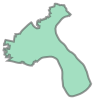

In [6]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [8]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


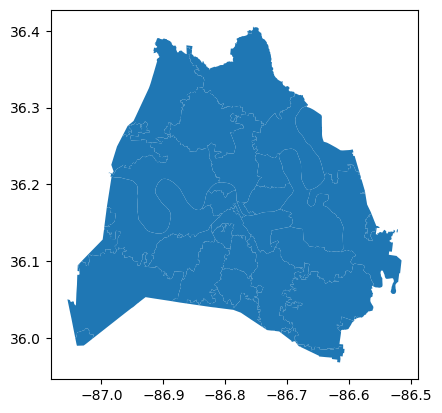

In [10]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


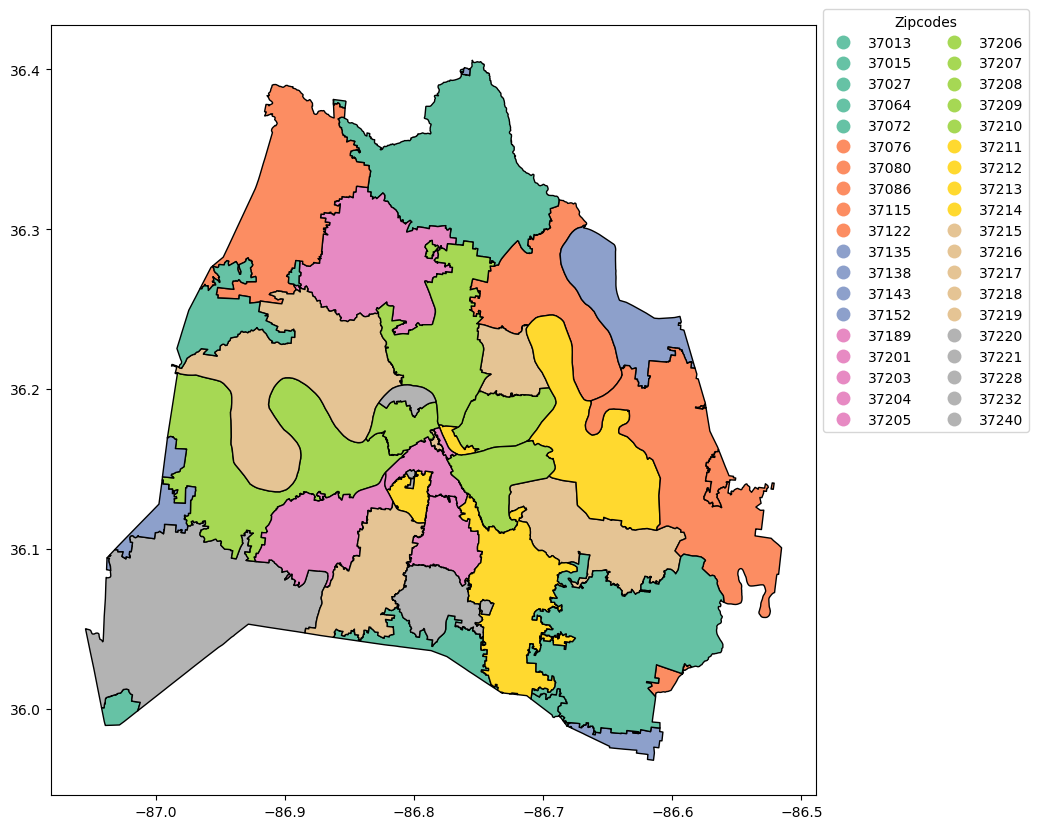

In [12]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [14]:
#bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
#print(bus_stops.shape)
#bus_stops.head(3)
short_term_rentals=pd.read_csv('../data/residential_short_term_rental_permits.csv')
short_term_rentals.head()
#print(short_term_rentals.shape)

C:\Users\thisi\AppData\Local\Temp\ipykernel_26536\649804202.py:4: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  short_term_rentals=pd.read_csv('../data/residential_short_term_rental_permits.csv')


,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,Contact Mobile Phone #,Contact Work Phone #,Contact Work Phone Ext,Longitude,Latitude,ObjectId,Zip Code,Parcel,x,y
0,2016037036,Short Term Rental - Non-Owner Occupied,7/21/2016 5:00:00 AM,8/2/2016 5:00:00 AM,2009 FRANKLIN AVE,NASHVILLE,TN,PT LOT B 1ST SUB BROWNSVILLE,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.733497,36.183848,1,37206,08306020100,-9.655129e+06,4.325948e+06
1,2016037102,Short Term Rental – Multifamily,7/22/2016 5:00:00 AM,11/7/2016 6:00:00 AM,908 1ST AVE N,NASHVILLE,TN,UNIT 908 RIVERFRONT CONDO 2ND AMEND,CASR,CAZ10A003,...,NaN,NaN,NaN,-86.780911,36.174009,2,37201,082140A04200CO,-9.660407e+06,4.324591e+06
2,2016037109,Short Term Rental – Multifamily,7/22/2016 5:00:00 AM,8/16/2016 5:00:00 AM,1304 B MONTGOMERY AVE,NASHVILLE,TN,UNIT 13 THE FLATS AT HIGHLAND HEIGHTS AMENDED,CASR,CAZ10A003,...,NaN,NaN,NaN,-86.756125,36.194246,3,37207,071160A01300CO,-9.657648e+06,4.327382e+06
3,2016037162,Short Term Rental - Owner Occupied,7/22/2016 5:00:00 AM,10/7/2016 5:00:00 AM,3210 SOUTHLAKE DR,NASHVILLE,TN,LOT 73 SEC 1 SOUTHLAKE,CASR,CAZ10A001,...,NaN,NaN,NaN,-86.728986,36.103950,5,37211,13303003300,-9.654627e+06,4.314934e+06
4,2016037223,Short Term Rental - Non-Owner Occupied,7/22/2016 5:00:00 AM,8/2/2016 5:00:00 AM,1012 BATTLEFIELD DR,NASHVILLE,TN,N SIDE BATTLEFIELD DR W OF LEALAND LANE,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.788441,36.115154,6,37204,11805008500,-9.661245e+06,4.316478e+06


In [15]:
#bus_stops.info()
short_term_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    16500 non-null  object 
 1   Permit Subtype Description  16500 non-null  object 
 2   Date Entered                16500 non-null  object 
 3   Date Issued                 15163 non-null  object 
 4   Address                     16500 non-null  object 
 5   City                        16499 non-null  object 
 6   State                       16499 non-null  object 
 7   Subdivision Lot             16497 non-null  object 
 8   Permit Type                 16500 non-null  object 
 9   Permit SubType              16500 non-null  object 
 10  Purpose                     16396 non-null  object 
 11  Council District            16500 non-null  int64  
 12  Census Tract                16500 non-null  int64  
 13  Expiration Date             164

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [17]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [19]:
'''
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))
'''
short_term_rentals_geo=gpd.GeoDataFrame(short_term_rentals,
                                        crs=zipcodes.crs,
                                        geometry=gpd.points_from_xy(short_term_rentals.Longitude,short_term_rentals.Latitude))

In [20]:
#type(bus_geo)
type(short_term_rentals_geo)

geopandas.geodataframe.GeoDataFrame

In [21]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [22]:
#stops_by_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')
short_term_rentals_by_zip=gpd.sjoin(short_term_rentals_geo,zipcodes,predicate='within')

In [23]:
short_term_rentals_by_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 16500 entries, 0 to 16499
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Permit #                    16500 non-null  object  
 1   Permit Subtype Description  16500 non-null  object  
 2   Date Entered                16500 non-null  object  
 3   Date Issued                 15163 non-null  object  
 4   Address                     16500 non-null  object  
 5   City                        16499 non-null  object  
 6   State                       16499 non-null  object  
 7   Subdivision Lot             16497 non-null  object  
 8   Permit Type                 16500 non-null  object  
 9   Permit SubType              16500 non-null  object  
 10  Purpose                     16396 non-null  object  
 11  Council District            16500 non-null  int64   
 12  Census Tract                16500 non-null  int64   
 13  Expiration Da

#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [25]:
short_term_rentals_by_zip['zip'].value_counts()

zip
37203    3324
37206    1876
37208    1437
37212    1381
37207    1372
37209    1214
37216     926
37210     808
37201     699
37211     515
37204     502
37214     435
37219     406
37217     229
37115     226
37218     208
37205     205
37215     135
37013     108
37076      95
37138      87
37221      75
37228      75
37189      37
37220      35
37072      35
37027      25
37080      14
37143       9
37064       2
37122       2
37015       1
37213       1
37135       1
Name: count, dtype: int64

#### Let's take a closer look at the 1214 short term rentals in the 37209 zip code
- filter the short_term_rentals_by_zip data to just get rentals in 37209
- filter the zip code geodataframe to just the polygon (row) for 37209


In [27]:
#stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']
#stops_in_37207.shape
rentals_in_37209=short_term_rentals_by_zip.loc[short_term_rentals_by_zip['zip']=='37209']
rentals_in_37209.shape

(1214, 43)

In [28]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 3)

#### Now plot these two together
- first plot the polygons for 37209 and make them pink
- next plot the points for the short term rental locations in indigo

C:\Users\thisi\AppData\Local\Temp\ipykernel_26536\3068177781.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37209.geometry.centroid.plot(ax=ax,color='red')


<Axes: >

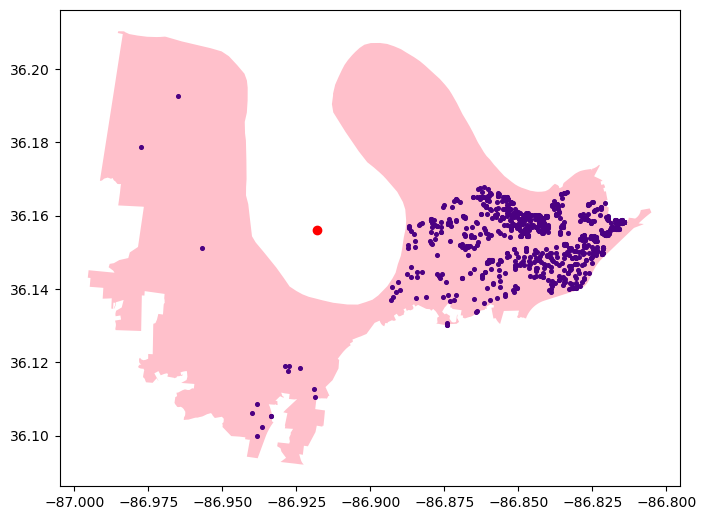

In [30]:
#fig, ax = matplotlib.subplots()
#ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
#stops_in_37207.plot( ax = ax, column = 'route');
#plt.show();
ax=polygon37209.plot(figsize=(8,10),color='pink')
rentals_in_37209.plot(ax=ax,color='indigo',markersize=7)
polygon37209.geometry.centroid.plot(ax=ax,color='red')

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [33]:
polygon37209.geometry.centroid

C:\Users\thisi\AppData\Local\Temp\ipykernel_26536\283130122.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37209.geometry.centroid


12    POINT (-86.91816 36.15605)
dtype: geometry

In [34]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37209.geometry.centroid[12]
print(center)

POINT (-86.91816342256455 36.15604558838379)


C:\Users\thisi\AppData\Local\Temp\ipykernel_26536\2884031337.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37209.geometry.centroid[12]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [36]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.15604558838379, -86.91816342256455]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [38]:
#create our map of Nashville Zip Code 37207 and show it
map_37209 = folium.Map(location =  area_center, zoom_start = 12)
map_37209

#### Next, let's add our 37209 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of short term rentals of 37209. 
- This idea will be helpful for creating our markers!

In [41]:
i = 0
for row_index, row_values in rentals_in_37209.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 6
values are:
 
Permit #                                                             2016037372
Permit Subtype Description               Short Term Rental - Non-Owner Occupied
Date Entered                                               7/25/2016 5:00:00 AM
Date Issued                                                 8/8/2016 5:00:00 AM
Address                                                       5203 KENTUCKY AVE
City                                                                  NASHVILLE
State                                                                        TN
Subdivision Lot                        LOT 1106 PT LOT 1104 BLK 170 WEST NASH 1
Permit Type                                                                CASR
Permit SubType                                                        CAZ10A002
Purpose                       By making this application for a Residential S...
Council District                                                             20
Census Tract   

#### Create map_37209 again with additional features:
- add the zipcode area outline (polygon_37209)
- iterate through the rentals_in_37209 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37209`
- display `map_37209`

In [43]:
'''
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207
'''
map_37209=folium.Map(location=area_center,zoom_start=12)
folium.GeoJson(polygon37209).add_to(map_37209)

for row_index, row_values in rentals_in_37209.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="purple",icon="bed", prefix='fa')


marker = folium.Marker(
        location = loc, 
        popup=pop,
    icon = icon) 

marker.add_to(map_37209)
map_37209.save('../maps/map37209.html')

#display our map
map_37209

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [46]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: Optional[int] = None,
    max_zoom: Optional[int] = None,
    zoom_start: int = 10,
    min_lat: float = -90,
    max_lat: float = 90,
    min_lon: float = -180,
    max_lon: float = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: Union[bool, str] = True,
    font_size: str = '1rem',
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base m

In [47]:
cluster_map_37209 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37209)

folium.GeoJson(polygon37209).add_to(cluster_map_37209)

# inside the loop add each marker to the cluster
for row_index, row_values in rentals_in_37209.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="purple",icon="bed", prefix='fa')

    marker = folium.Marker(
        location = loc, 
        popup=pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)


#save an interactive HTML map by calling .save()
cluster_map_37209.save('../maps/cluster37209.html')

cluster_map_37209  


In [48]:
#draw our zip code area: 37209
map_37209 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37209).add_to(map_37209)

#create a list of locations and pass them to FastMarkerCluster()
locations = rentals_in_37209[['Latitude', 'Longitude']].values.tolist()
map_37209.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37209